In [1]:
require(lme4, warn.conflicts=F)
require(lmerTest, warn.conflicts=F)
require(MASS, warn.conflicts=F)
require(ggplot2, warn.conflicts=F)
require(dplyr, warn.conflicts=F)

Loading required package: lme4

Loading required package: Matrix

Loading required package: lmerTest

Loading required package: MASS

Loading required package: ggplot2

Loading required package: dplyr



In [7]:
data = read.csv("data/rolemean_acoustic.csv")

In [8]:
names(data)

[1] "transcription" "role"          "meaning"       "speaker"      
 [5] "t_start"       "t_end"         "freq_f1"       "freq_f2"      
 [9] "freq_f3"       "a1p0"          "point_time"    "point_pct"    
[13] "filename"

In [10]:
data$freq_f1 = data$freq_f1 + 1
data$filename = factor(data$filename)
data = data[data$speaker=='A',]

data$transcription = factor(data$transcription)
names(data)[names(data)=="a1p0"] = "nasality"

In [11]:
table(data$role)


       CFT disfluency     filler      other   response 
       125         20        555         10          5 

In [12]:
data$role_rc = recode(data$role, disfluency="other", response="other")
table(data$role_rc)


   CFT filler  other 
   125    555     35 

In [13]:
data$meaning_rc = data$meaning
data$meaning_rc[grep(",", data$meaning)] = "complex"
data$meaning_rc = relevel(factor(data$meaning_rc), ref='neutral')

In [14]:
table(data$meaning)


                authority         authority,concern authority,dissatisfaction 
                       75                         5                        10 
                  control        control,old_ground           control,thought 
                       75                         5                         5 
          dissatisfaction                   neutral                  new_info 
                       15                       135                        10 
               old_ground                   thought 
                       70                       310 

In [15]:
table(data$meaning_rc)


        neutral       authority         complex         control dissatisfaction 
            135              75              25              75              15 
       new_info      old_ground         thought 
             10              70             310 

In [16]:
table(data$transcription)


   eh    ha    he    ho   huh     i la-ho     m    no    oh  sisi    ͡ts    uh 
   15     5    10   280     5     5     5     5     5    35     5     5   310 
   um   w,w    wa 
   15     5     5 

In [17]:
data$point_pct = relevel(factor(data$point_pct), ref='50')
data$role_rc = relevel(factor(data$role_rc), ref='other')

In [18]:
head(data)

,transcription,role,meaning,speaker,t_start,t_end,freq_f1,freq_f2,freq_f3,nasality,point_time,point_pct,filename,role_rc,meaning_rc
,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,he,filler,neutral,A,7.761102,8.006046,820,1923,2689,-8.36,7.785597,10,陳椒華-127940,filler,neutral
2,he,filler,neutral,A,7.761102,8.006046,820,2032,2914,-2.85,7.834585,30,陳椒華-127940,filler,neutral
3,he,filler,neutral,A,7.761102,8.006046,756,2045,3070,-3.75,7.883574,50,陳椒華-127940,filler,neutral
4,he,filler,neutral,A,7.761102,8.006046,368,1960,3185,5.78,7.932563,70,陳椒華-127940,filler,neutral
5,he,filler,neutral,A,7.761102,8.006046,217,1966,3736,0.00,7.981551,90,陳椒華-127940,filler,neutral
11,uh,filler,thought,A,9.568283,10.063530,626,1614,2995,-5.31,9.617808,10,陳椒華-127940,filler,thought


In [22]:
f1_bc = boxcox(lm(data$freq_f1~1), plotit=F)
print(f1_bc$x[which.max(f1_bc$y)])
data$freq_f1_cox = data$freq_f1 ^ 1

[1] 1


In [23]:
f2_bc = boxcox(lm(data$freq_f2~1), plotit=F)
print(f2_bc$x[which.max(f2_bc$y)])
data$freq_f2_cox = data$freq_f2 ^ -0.5

[1] -0.5


In [24]:
f3_bc = boxcox(lm(data$freq_f3~1), plotit=F)
print(f3_bc$x[which.max(f3_bc$y)])
data$freq_f3_cox = data$freq_f3 ^ 1.5

[1] 1.5


In [25]:
nas_tr = data$nasality - min(data$nasality)+0.01
nas_bc = boxcox(lm(nas_tr~1), plotit=F)
print(nas_bc$x[which.max(nas_bc$y)])
data$nasality_cox = nas_tr ^ 1.2

[1] 1


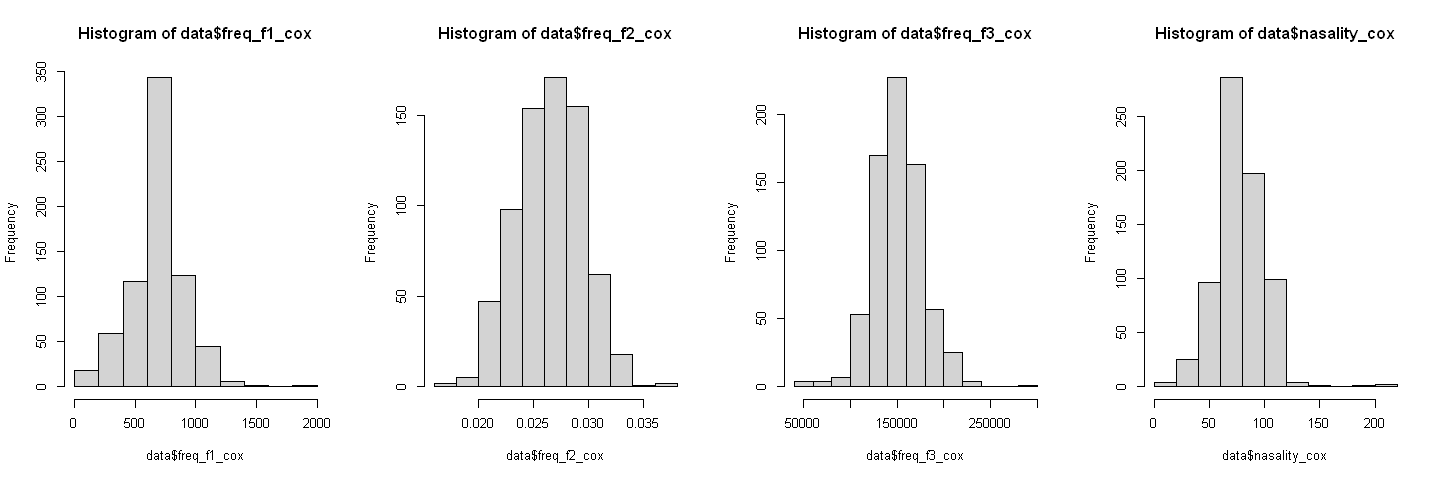

In [26]:
options(repr.plot.width=12, repr.plot.height=4)
par(mfrow=c(1,4))
hist(data$freq_f1_cox)
hist(data$freq_f2_cox)
hist(data$freq_f3_cox)
hist(data$nasality_cox)

In [40]:
xtabs(~role_rc+transcription, data)

        transcription
role_rc   eh  ha  he  ho huh   i la-ho   m  no  oh sisi  ͡ts  uh  um w,w  wa
  other    0   0   5   0   5   5     0   0   5   0    5   5   0   0   5   0
  CFT      5   0   0  90   0   0     5   0   0  25    0   0   0   0   0   0
  filler  10   5   5 190   0   0     0   5   0  10    0   0 310  15   0   5

In [41]:
xtabs(~meaning_rc+transcription, data)

                 transcription
meaning_rc         eh  ha  he  ho huh   i la-ho   m  no  oh sisi  ͡ts  uh  um
  neutral           0   0  10  80   5   0     0   5   0  10    5   0  20   0
  authority        10   0   0  60   0   0     5   0   0   0    0   0   0   0
  complex           0   0   0  15   0   0     0   0   0  10    0   0   0   0
  control           0   0   0  65   0   0     0   0   0  10    0   0   0   0
  dissatisfaction   5   5   0   5   0   0     0   0   0   0    0   0   0   0
  new_info          0   0   0   5   0   0     0   0   0   0    0   0   0   0
  old_ground        0   0   0  45   0   5     0   0   5   5    0   5   0   0
  thought           0   0   0   5   0   0     0   0   0   0    0   0 290  15
                 transcription
meaning_rc        w,w  wa
  neutral           0   0
  authority         0   0
  complex           0   0
  control           0   0
  dissatisfaction   0   0
  new_info          0   5
  old_ground        5   0
  thought           0   0

## Mixed Models

In [35]:
m_f1t = lmer(freq_f1_cox~role_rc+meaning_rc+transcription+(1|filename)+(1|point_pct), data=data)
summary(m_f1t, corr=F)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_f1_cox ~ role_rc + meaning_rc + transcription + (1 | filename) +  
    (1 | point_pct)
   Data: data

REML criterion at convergence: 9273.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2959 -0.4807 -0.0086  0.5219  6.8463 

Random effects:
 Groups    Name        Variance Std.Dev.
 point_pct (Intercept)  2524     50.24  
 filename  (Intercept)  6407     80.04  
 Residual              35624    188.74  
Number of obs: 715, groups:  point_pct, 5; filename, 4

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                546.995    143.604  270.457   3.809 0.000173 ***
role_rcCFT                  35.678    122.753  683.549   0.291 0.771409    
role_rcfiller                2.673    120.804  683.832   0.022 0.982354    
meaning_rcauthority        -54.192     31.517  684.767  -1.719 0.085977 .  
meaning_rccomplex         

In [31]:
m_f1t = lmer(freq_f1_cox~role_rc+meaning_rc+transcription+(1|filename)+(1|point_pct), data=data)
summary(m_f1, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_f1_cox ~ role_rc + meaning_rc + (1 | filename) + (1 | point_pct)
   Data: data

REML criterion at convergence: 9563.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2059 -0.4787  0.0110  0.5213  6.2557 

Random effects:
 Groups    Name        Variance Std.Dev.
 point_pct (Intercept)  2478     49.78  
 filename  (Intercept)  3652     60.43  
 Residual              42119    205.23  
Number of obs: 715, groups:  point_pct, 5; filename, 4

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                763.523     54.909   21.968  13.905 2.29e-12 ***
role_rcCFT                  22.434     41.887  700.129   0.536  0.59241    
role_rcfiller              -57.713     41.097  700.955  -1.404  0.16067    
meaning_rcauthority        -29.265     29.981  698.930  -0.976  0.32934    
meaning_rccomplex            3.114     46.303  7

In [34]:
m_f2t = lmer(freq_f2_cox~role_rc+meaning_rc+transcription+(1|filename)+(1|point_pct), data=data)
summary(m_f2t, corr=F)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_f2_cox ~ role_rc + meaning_rc + transcription + (1 | filename) +  
    (1 | point_pct)
   Data: data

REML criterion at convergence: -6180.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9997 -0.5752  0.0092  0.5929  4.6237 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 point_pct (Intercept) 8.988e-07 0.0009481
 filename  (Intercept) 6.683e-07 0.0008175
 Residual              6.675e-06 0.0025835
Number of obs: 715, groups:  point_pct, 5; filename, 4

Fixed effects:
                            Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                2.167e-02  1.952e-03  3.743e+02  11.102  < 2e-16 ***
role_rcCFT                 6.281e-04  1.680e-03  6.840e+02   0.374 0.708596    
role_rcfiller              1.219e-03  1.653e-03  6.844e+02   0.737 0.461165    
meaning_rcauthority        7.120e-04  4.311e-04  6.856e+02   1.651 0.099098 .

In [32]:
m_f2 = lmer(freq_f2_cox~role_rc+meaning_rc+(1|filename)+(1|point_pct), data=data)
summary(m_f2, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_f2_cox ~ role_rc + meaning_rc + (1 | filename) + (1 | point_pct)
   Data: data

REML criterion at convergence: -6260.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8636 -0.6382  0.0499  0.6260  4.3175 

Random effects:
 Groups    Name        Variance  Std.Dev. 
 point_pct (Intercept) 8.929e-07 0.0009449
 filename  (Intercept) 2.086e-07 0.0004567
 Residual              7.530e-06 0.0027441
Number of obs: 715, groups:  point_pct, 5; filename, 4

Fixed effects:
                            Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)                2.302e-02  7.182e-04  2.535e+01  32.049  < 2e-16 ***
role_rcCFT                 4.105e-03  5.592e-04  7.009e+02   7.341 5.90e-13 ***
role_rcfiller              4.014e-03  5.478e-04  6.963e+02   7.327 6.55e-13 ***
meaning_rcauthority        3.559e-04  4.006e-04  7.001e+02   0.888  0.37466    
meaning_rccomplex  

In [36]:
m_f3t = lmer(freq_f3_cox~role_rc+meaning_rc+transcription+(1|filename)+(1|point_pct), data=data)
summary(m_f3t)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_f3_cox ~ role_rc + meaning_rc + transcription + (1 | filename) +  
    (1 | point_pct)
   Data: data

REML criterion at convergence: 16065.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2284 -0.5818 -0.0323  0.5402  5.0680 

Random effects:
 Groups    Name        Variance  Std.Dev.
 point_pct (Intercept)   4839299  2200   
 filename  (Intercept)  33828445  5816   
 Residual              681495036 26105   
Number of obs: 715, groups:  point_pct, 5; filename, 4

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)               136918.5    19030.8    561.2   7.195 2.02e-12 ***
role_rcCFT                 10169.4    16969.8    684.6   0.599   0.5492    
role_rcfiller              10913.4    16695.6    685.3   0.654   0.5135    
meaning_rcauthority        -8780.5     4351.7    686.0  -2.018   0.0440 *  
meaning_rccomplex    

In [19]:
m_f3 = lmer(freq_f3_cox~role_rc+meaning_rc+(1|filename)+(1|point_pct), data=data)
summary(m_f3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_f3_cox ~ role_rc + meaning_rc + (1 | filename) + (1 | point_pct)
   Data: data

REML criterion at convergence: 10606.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6819 -0.5622 -0.0642  0.4907  5.7811 

Random effects:
 Groups    Name        Variance Std.Dev.
 point_pct (Intercept)   4.488   2.118  
 filename  (Intercept)  12.014   3.466  
 Residual              527.321  22.963  
Number of obs: 1170, groups:  point_pct, 5; filename, 4

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                256.417      3.993   49.368  64.209  < 2e-16 ***
role_rcBC                    3.229      4.217 1146.022   0.766  0.44403    
role_rcCFT                   1.678      3.732 1151.722   0.450  0.65315    
role_rcfiller                1.508      3.478 1152.093   0.434  0.66455    
meaning_rcauthority         -7.461      2.545 

In [37]:
m_nast = lmer(nasality_cox~role_rc+meaning_rc+transcription+(1|filename)+(1|point_pct), data=data)
summary(m_nast)


Correlation matrix not shown by default, as p = 25 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
nasality_cox ~ role_rc + meaning_rc + transcription + (1 | filename) +  
    (1 | point_pct)
   Data: data

REML criterion at convergence: 5975.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6811 -0.4771  0.0280  0.5278  7.5256 

Random effects:
 Groups    Name        Variance Std.Dev.
 point_pct (Intercept)  42.51    6.52   
 filename  (Intercept) 121.38   11.02   
 Residual              297.14   17.24   
Number of obs: 715, groups:  point_pct, 5; filename, 4

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                56.4873    13.9086  99.8298   4.061 9.72e-05 ***
role_rcCFT                  9.8218    11.2123 683.3004   0.876  0.38135    
role_rcfiller              13.8538    11.0349 683.4312   1.255  0.20974    
meaning_rcauthority         5.3173     2.8796 683.9407   1.847  0.06525 .  
meaning_rccomplex       

In [20]:
m_nas = lmer(nasality_cox~role_rc+meaning_rc+(1|filename)+(1|point_pct), data=data)
summary(m_nas)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: nasality_cox ~ role_rc + meaning_rc + (1 | filename) + (1 | point_pct)
   Data: data

REML criterion at convergence: 10026.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6179 -0.5376  0.0430  0.6122  7.3051 

Random effects:
 Groups    Name        Variance Std.Dev.
 point_pct (Intercept)  38.90    6.237  
 filename  (Intercept)  72.08    8.490  
 Residual              315.20   17.754  
Number of obs: 1170, groups:  point_pct, 5; filename, 4

Fixed effects:
                           Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                 69.8596     5.7452    8.4798  12.160 1.17e-06 ***
role_rcBC                   -5.0853     3.2700 1152.6449  -1.555 0.120192    
role_rcCFT                  -1.8870     2.8860 1151.1087  -0.654 0.513333    
role_rcfiller                1.0950     2.6939 1152.0586   0.406 0.684466    
meaning_rcauthority          5.4081

## Eyeballing function

In [21]:
require(ggplot2)
require(tidyr)
require(dplyr)

Loading required package: tidyr


Attaching package: 'tidyr'


The following objects are masked from 'package:Matrix':

    expand, pack, unpack




In [22]:
pdata = data %>% select(filename, starts_with("freq_"), nasality, 
                        role_rc, meaning_rc) %>%     
    pivot_longer(cols=c(freq_f1, freq_f2, freq_f3, nasality), names_to="var") %>%
    select(-starts_with("freq"))

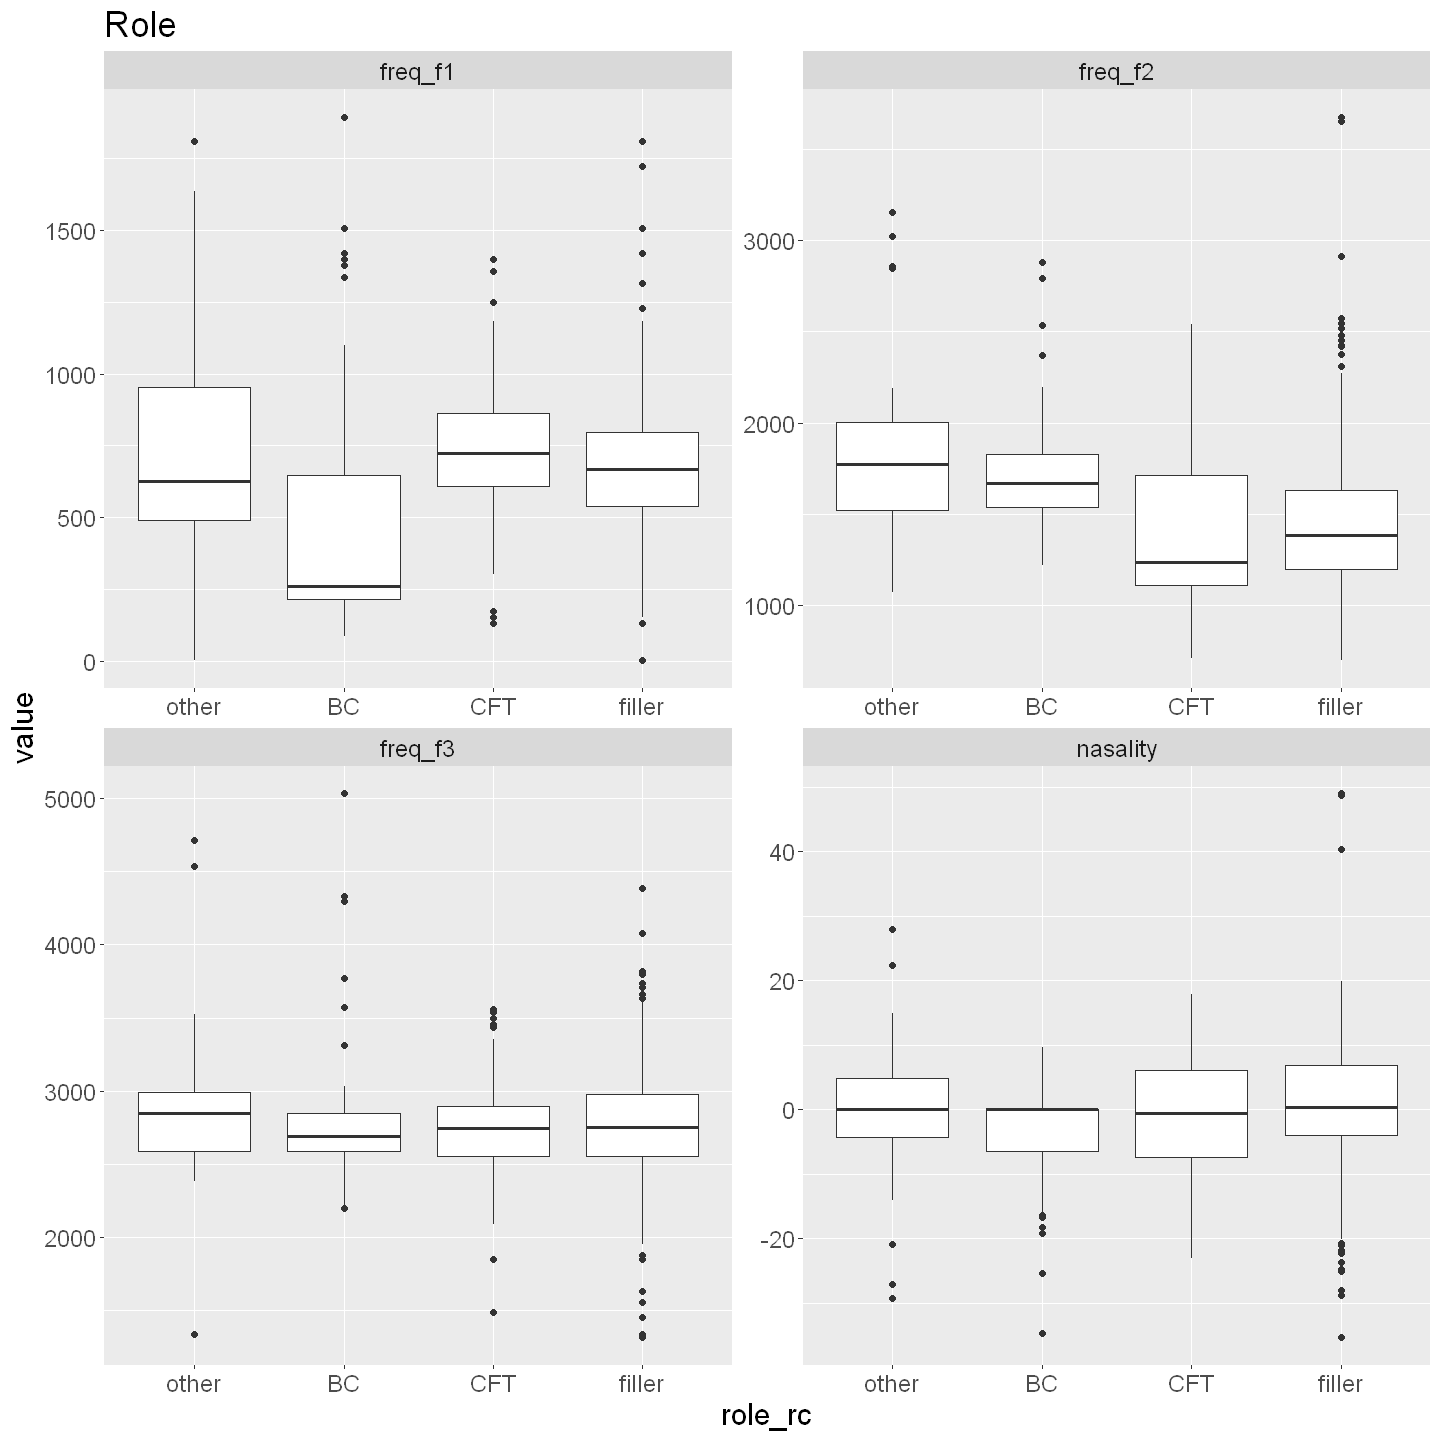

In [23]:
options(repr.plot.width=12, repr.plot.height=12)
ggplot(pdata, aes(x=role_rc, y=value))+ geom_boxplot() + 
    facet_wrap(.~var, scales="free") + 
    theme(text=element_text(size=18)) + 
    ggtitle("Role")

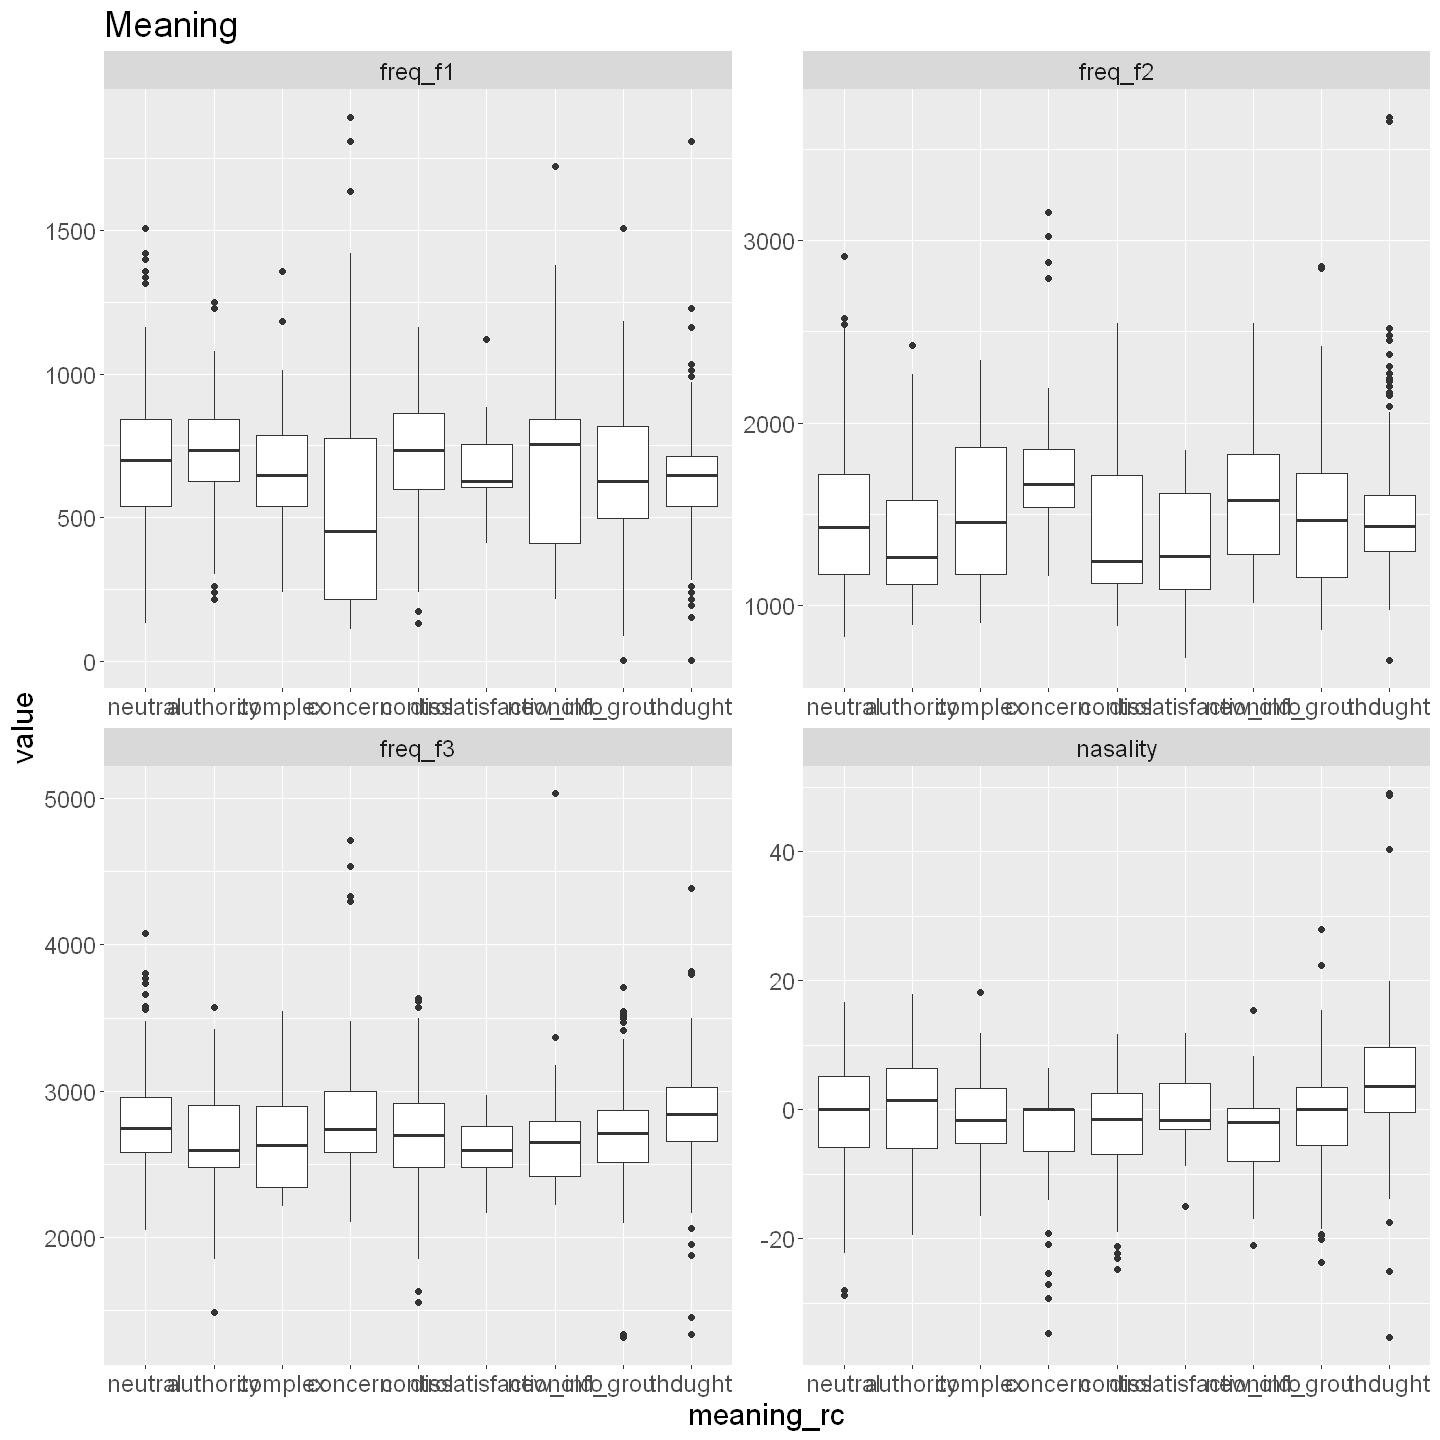

In [24]:
options(repr.plot.width=12, repr.plot.height=12)
ggplot(pdata, aes(x=meaning_rc, y=value))+ geom_boxplot() + 
    facet_wrap(.~var, scales="free") + 
    theme(text=element_text(size=18)) + 
    ggtitle("Meaning")